# importation des librairy utilisées dans ce projet

*Utilisation de la librairy tenserflow 2.8.0*

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


*importation des librairy pour ce projet*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional

# Importation des données utilisées

*Importation des données utilisées :*
lien de la base utilisé : https://raw.githubusercontent.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/master/SMSSpamCollection


In [ ]:
data='/content/spam_nospam.txt'
text = open(data, 'r').read()
messages = pd.read_csv(data, sep ='\t',names=["label", "message"])
messages[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# ANALYSE DESCRIPTIVE DU TEXTE DE LA BASE

In [ ]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


*calcule de nombre de vocabulaire*

In [ ]:
vocab = sorted(set(text))
print(vocab)
len(vocab)

['\t', '\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '|', '~', '\x91', '\x92', '\x93', '\x94', '\x96', '¡', '£', '»', 'É', 'Ü', 'è', 'é', 'ì', 'ú', 'ü', '–', '—', '‘', '’', '“', '…', '┾', '〨', '鈥']


118

In [ ]:
char_to_ind = {u:i for i, u in enumerate(vocab)}

In [ ]:
char_to_ind

{'\t': 0,
 '\n': 1,
 ' ': 2,
 '!': 3,
 '"': 4,
 '#': 5,
 '$': 6,
 '%': 7,
 '&': 8,
 "'": 9,
 '(': 10,
 ')': 11,
 '*': 12,
 '+': 13,
 ',': 14,
 '-': 15,
 '.': 16,
 '/': 17,
 '0': 18,
 '1': 19,
 '2': 20,
 '3': 21,
 '4': 22,
 '5': 23,
 '6': 24,
 '7': 25,
 '8': 26,
 '9': 27,
 ':': 28,
 ';': 29,
 '<': 30,
 '=': 31,
 '>': 32,
 '?': 33,
 '@': 34,
 'A': 35,
 'B': 36,
 'C': 37,
 'D': 38,
 'E': 39,
 'F': 40,
 'G': 41,
 'H': 42,
 'I': 43,
 'J': 44,
 'K': 45,
 'L': 46,
 'M': 47,
 'N': 48,
 'O': 49,
 'P': 50,
 'Q': 51,
 'R': 52,
 'S': 53,
 'T': 54,
 'U': 55,
 'V': 56,
 'W': 57,
 'X': 58,
 'Y': 59,
 'Z': 60,
 '[': 61,
 '\\': 62,
 ']': 63,
 '^': 64,
 '_': 65,
 'a': 66,
 'b': 67,
 'c': 68,
 'd': 69,
 'e': 70,
 'f': 71,
 'g': 72,
 'h': 73,
 'i': 74,
 'j': 75,
 'k': 76,
 'l': 77,
 'm': 78,
 'n': 79,
 'o': 80,
 'p': 81,
 'q': 82,
 'r': 83,
 's': 84,
 't': 85,
 'u': 86,
 'v': 87,
 'w': 88,
 'x': 89,
 'y': 90,
 'z': 91,
 '|': 92,
 '~': 93,
 '\x91': 94,
 '\x92': 95,
 '\x93': 96,
 '\x94': 97,
 '\x96': 98,
 '

*Suppression des messages dupliqué*

In [ ]:
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow[:5])

    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' Happy B'd...
223   ham                             Sorry, I'll call later
326   ham                   No calls..messages..missed calls


In [ ]:
messages=messages.drop_duplicates()
len(messages)

5169

In [ ]:
messages.groupby('label').describe().T

label                                                         ham  \
message count                                                4516   
        unique                                               4516   
        top     Go until jurong point, crazy.. Available only ...   
        freq                                                    1   

label                                                        spam  
message count                                                 653  
        unique                                                653  
        top     Free entry in 2 a wkly comp to win FA Cup fina...  
        freq                                                    1

*Visulalisé les mots les plus frequents pour le ham et spam*

In [ ]:
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

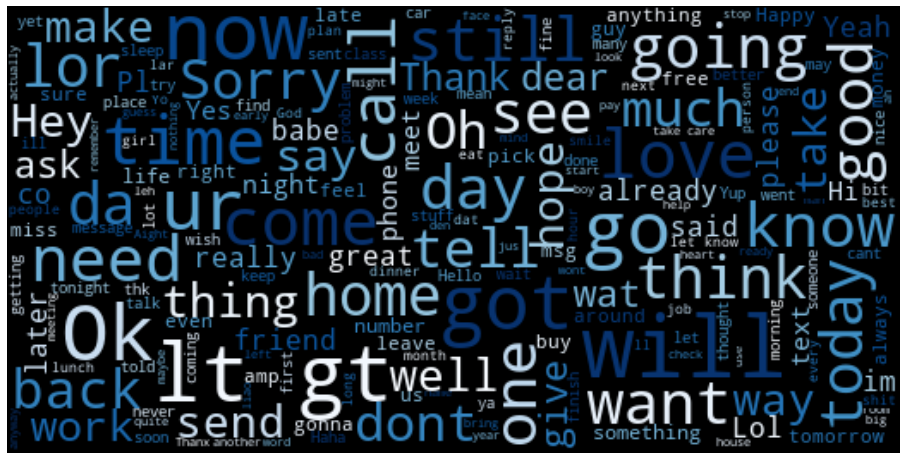

In [ ]:
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

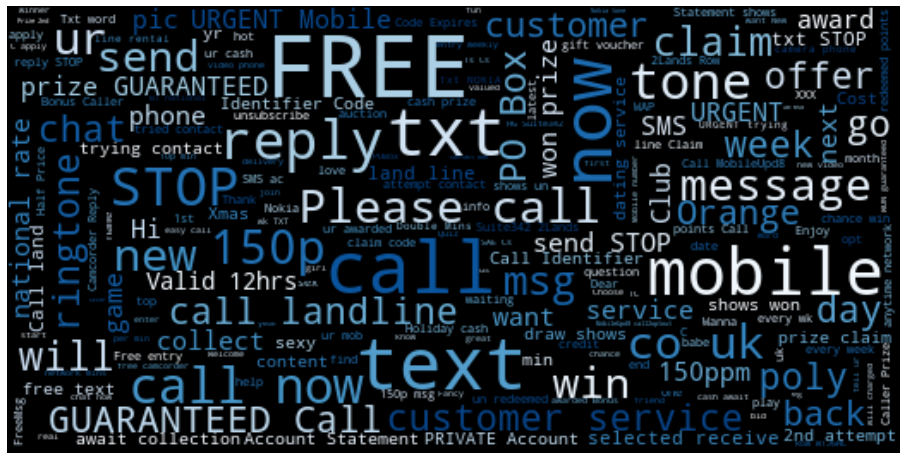

In [ ]:
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
topMessages = messages.groupby("message")["label"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
message,,
&lt;#&gt; in mca. But not conform.,1,ham
S:)8 min to go for lunch:),1,ham
Rofl betta invest in some anti aging products,1,ham
"Rock yr chik. Get 100's of filthy films &XXX pics on yr phone now. rply FILTH to 69669. Saristar Ltd, E14 9YT 08701752560. 450p per 5 days. Stop2 cancel",1,spam
Ringtone Club: Gr8 new polys direct to your mobile every week !,1,spam
Ringtone Club: Get the UK singles chart on your mobile each week and choose any top quality ringtone! This message is free of charge.,1,spam
Rightio. 11.48 it is then. Well arent we all up bright and early this morning.,1,ham
"Right on brah, see you later",1,ham
Right it wasnt you who phoned it was someone with a number like yours!,1,ham


*on observe que notre dataset n'est pas equilibre donc,dans ce cas il faut utiliser une autre technique d'échantillonnage stratifier et pas cross validation...mais dans notre cas on va fixé l'equilibre de notre datasets*

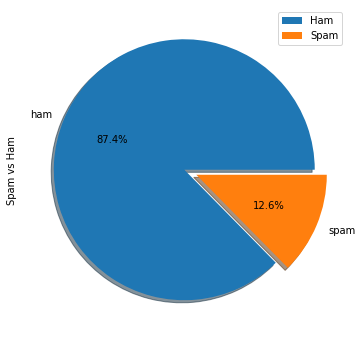

In [ ]:
messages["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(653, 2) (653, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Message types')

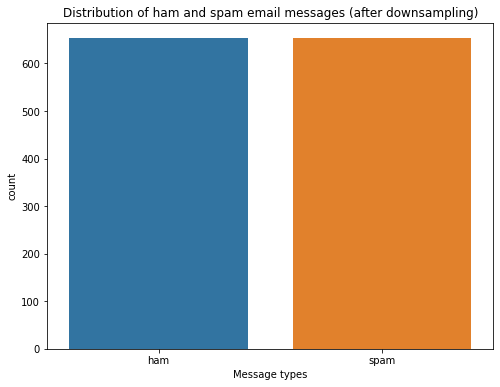

In [ ]:
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [ ]:
print(ham_msg['message'].apply(len))
print("***********")
print(spam_msg['message'].apply(len))

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     36
5569     57
5570    125
5571     26
Name: message, Length: 4516, dtype: int64
***********
2       155
5       147
8       157
9       154
11      136
       ... 
5537     90
5540    158
5547    160
5566    147
5567    160
Name: message, Length: 653, dtype: int64


In [ ]:
msg_df['text_length'] = msg_df['message'].apply(len)
labels = msg_df.groupby('label').mean()
labels

,text_length
label,
ham,70.633997
spam,137.704441


# Pré-traitement des données

*on va maintenant mape notre dataframe et initialisé les variables de l'entraînement et de test*

In [ ]:
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values

train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2, random_state=434)

In [ ]:
print(train_msg.shape,test_msg.shape,train_labels.shape,test_labels.shape)

(1044,) (262,) (1044,) (262,)


# Traitement des données

In [ ]:
len(vocab)

118

*Definir les hyperparameters de traitement donnée*

In [ ]:
max_len = 50
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"
vocab_size = 500

*separer chaque(tokenize) mot et le fiter sur les messages d'entraînement*

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

*trouver l'indice de mot*

In [ ]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'for': 10,
 '2': 11,
 'is': 12,
 'now': 13,
 'free': 14,
 'and': 15,
 'or': 16,
 'in': 17,
 'on': 18,
 'have': 19,
 'of': 20,
 'ur': 21,
 'txt': 22,
 '4': 23,
 'me': 24,
 'from': 25,
 'stop': 26,
 'with': 27,
 'are': 28,
 'it': 29,
 'this': 30,
 'text': 31,
 'reply': 32,
 'mobile': 33,
 'my': 34,
 'just': 35,
 'get': 36,
 'no': 37,
 'claim': 38,
 'we': 39,
 'that': 40,
 'so': 41,
 'only': 42,
 'do': 43,
 'if': 44,
 'our': 45,
 'prize': 46,
 'be': 47,
 'www': 48,
 'out': 49,
 'will': 50,
 'new': 51,
 'at': 52,
 'send': 53,
 'go': 54,
 'can': 55,
 'not': 56,
 '150p': 57,
 'all': 58,
 'cash': 59,
 'won': 60,
 'but': 61,
 'msg': 62,
 '1': 63,
 'please': 64,
 'what': 65,
 'know': 66,
 'urgent': 67,
 'up': 68,
 'want': 69,
 'when': 70,
 "i'm": 71,
 'contact': 72,
 'been': 73,
 't': 74,
 'nokia': 75,
 'phone': 76,
 'by': 77,
 'win': 78,
 'who': 79,
 'uk': 80,
 'week': 81,
 'service': 82,
 'com': 8

*verifier le nombre des mots*

In [ ]:
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 3988 unique tokens in training data. 


*ici on va implementer le principe de One-Hot Encoding qui va nous aider par la suite de partir d’une représentation one-hot-encoding des mots d’une langue et créer un espace dense de dimensions moins elever pour LSTM*

In [ ]:
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,
padding = padding_type, truncating = trunc_type)

In [ ]:
training_padded

array([[  3,  50,  47, ...,   0,   0,   0],
       [304,   9,  36, ...,   0,   0,   0],
       [  1,   1,  12, ...,   0,   0,   0],
       ...,
       [111,   1,  17, ...,   0,   0,   0],
       [  1,  65,   1, ...,   0,   0,   0],
       [178,  10,   8, ...,   0,   0,   0]], dtype=int32)

In [ ]:
testing_sequences

[[55, 3, 64, 53, 24, 34, 1, 131],
 [160,
  5,
  100,
  280,
  1,
  69,
  2,
  130,
  16,
  119,
  24,
  1,
  31,
  347,
  2,
  1,
  31,
  357,
  52,
  1,
  2,
  240,
  31,
  26,
  1],
 [405, 5, 1, 40, 31, 24, 70, 410, 466],
 [40, 1, 137, 430, 3, 108, 2, 47, 1],
 [14,
  10,
  208,
  81,
  1,
  75,
  90,
  23,
  21,
  33,
  123,
  81,
  35,
  22,
  75,
  2,
  1,
  36,
  1,
  15,
  188,
  21,
  1,
  48,
  1,
  95,
  80,
  425,
  1,
  1,
  105,
  1,
  90],
 [462, 221, 133, 17, 7, 1, 1],
 [1,
  56,
  1,
  120,
  106,
  1,
  25,
  7,
  130,
  1,
  10,
  14,
  1,
  331,
  31,
  54,
  2,
  1,
  44,
  9,
  36,
  1,
  9,
  493,
  444,
  1,
  27,
  433,
  192,
  451,
  475],
 [30,
  62,
  12,
  10,
  8,
  33,
  319,
  271,
  29,
  96,
  73,
  1,
  98,
  1,
  196,
  1,
  1,
  2,
  192,
  1,
  1,
  2,
  1,
  1,
  80,
  83],
 [110, 21, 1, 32],
 [5, 1, 3, 108, 438, 17, 7, 1, 1, 1, 1, 1, 4, 412, 1],
 [110,
  202,
  5,
  1,
  11,
  54,
  1,
  1,
  23,
  4,
  1,
  11,
  1,
  1,
  9,
  429,
  11,
  53,
 

In [ ]:
testing_padded

array([[ 55,   3,  64, ...,   0,   0,   0],
       [160,   5, 100, ...,   0,   0,   0],
       [405,   5,   1, ...,   0,   0,   0],
       ...,
       [ 44,   3, 210, ...,   0,   0,   0],
       [129, 326,  58, ...,   0,   0,   0],
       [  1,  18,   7, ...,   0,   0,   0]], dtype=int32)

In [ ]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (1044, 50)
Shape of testing tensor:  (262, 50)


In [ ]:
# Before padding
len(training_sequences[0]), len(training_sequences[1])

(12, 5)

In [ ]:
# After padding
len(training_padded[0]), len(training_padded[1])

(50, 50)

In [ ]:
print(training_padded[0])

[  3  50  47   1  30   1   1   1 151   1 215  29   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


# Création du Modèle

*Definir les hyperparameters pour le model*

In [ ]:
vocab_size = 500
embeding_dim = 16
drop_value = 0.2
n_dense = 24

dans cette partie on va utilise troix model :

*   réseau de neurones classique
*   long short-term memory (LSTM)
*   bidirectional long short-term memory (Bidirectional LSTM)

puis on va comparer la performance de chaque model...on n'a aussi utiliser un algorithme d'apprentissage non supervise (Word2Vec) pour vectoriser et réduire la dimension de notre vecteur quand n'a générer grace au (ONE HOT ENCODING).

et par la suite on va utiliser le principe de CROSS VALIDATION et le GRIDSEARCH CV qui v'a fouillé les meilleurs hyparametres pour notre probleme

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
33/33 - 4s - loss: 0.6916 - accuracy: 0.5785 - val_loss: 0.6879 - val_accuracy: 0.7863 - 4s/epoch - 121ms/step
Epoch 2/30
33/33 - 0s - loss: 0.6785 - accuracy: 0.8592 - val_loss: 0.6692 - val_accuracy: 0.8740 - 131ms/epoch - 4ms/step
Epoch 3/30
33/33 - 0s - loss: 0.6497 - accuracy: 0.8688 - val_loss: 0.6295 - val_accuracy: 0.8893 - 151ms/epoch - 5ms/step
Epoch 4/30
33/33 - 0s - loss: 0.5916 - accuracy: 0.8764 - val_loss: 0.5608 - val_accuracy: 0.9008 - 129ms/epoch - 4ms/step
Epoch 5/30
33/33 - 0s - loss: 0.5059 - accuracy: 0.8898 - val_loss: 0.4757 - val_accuracy: 0.9008 - 133ms/epoch - 4ms/step
Epoch 6/30
33/33 - 0s - loss: 0.4262 - accuracy: 0.8898 - val_loss: 0.4015 - val_accuracy: 0.9122 - 133ms/epoch - 4ms/step
Epoch 7/30
33/33 - 0s - loss: 0.3527 - accuracy: 0.8994 - val_loss: 0.3400 - val_accuracy: 0.9122 - 130ms/epoch - 4ms/step
Epoch 8/30
33/33 - 0s - loss: 0.3014 - accuracy: 0.9080 - val_loss: 0.2909 - val_accuracy: 0.9122 - 137ms/epoch - 4ms/step
Epoch 9/30
33/33 

In [ ]:
model.evaluate(testing_padded, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9580


[0.0938425213098526, 0.9580152630805969]

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

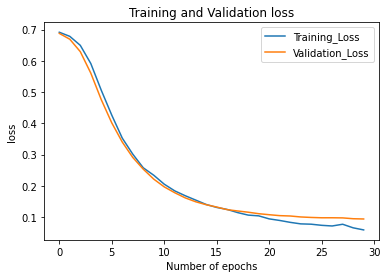

In [ ]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

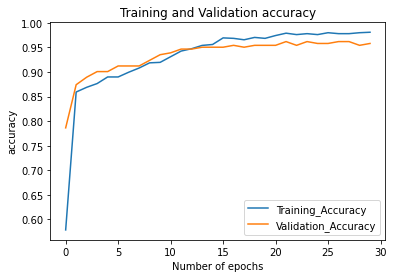

In [ ]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

# LSTM

In [ ]:
n_lstm = 20
drop_lstm =0.2

In [ ]:
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm,dropout=drop_lstm))
#model1.add(LSTM(20, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model1.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
33/33 - 5s - loss: 0.6933 - accuracy: 0.5115 - val_loss: 0.6941 - val_accuracy: 0.4695 - 5s/epoch - 147ms/step
Epoch 2/30
33/33 - 0s - loss: 0.6927 - accuracy: 0.5105 - val_loss: 0.6930 - val_accuracy: 0.4771 - 220ms/epoch - 7ms/step
Epoch 3/30
33/33 - 0s - loss: 0.6160 - accuracy: 0.6916 - val_loss: 0.3604 - val_accuracy: 0.8931 - 247ms/epoch - 7ms/step
Epoch 4/30
33/33 - 0s - loss: 0.4037 - accuracy: 0.8784 - val_loss: 0.8166 - val_accuracy: 0.7137 - 219ms/epoch - 7ms/step
Epoch 5/30
33/33 - 0s - loss: 0.4628 - accuracy: 0.8429 - val_loss: 0.2740 - val_accuracy: 0.9351 - 258ms/epoch - 8ms/step
Epoch 6/30
33/33 - 0s - loss: 0.2872 - accuracy: 0.9243 - val_loss: 0.2147 - val_accuracy: 0.9542 - 251ms/epoch - 8ms/step
Epoch 7/30
33/33 - 0s - loss: 0.2235 - accuracy: 0.9464 - val_loss: 0.1888 - val_accuracy: 0.9580 - 248ms/epoch - 8ms/step
Epoch 8/30
33/33 - 0s - loss: 0.3893 - accuracy: 0.8621 - val_loss: 0.2909 - val_accuracy: 0.9046 - 253ms/epoch - 8ms/step
Epoch 9/30
33/33 

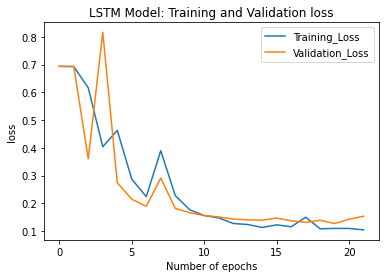

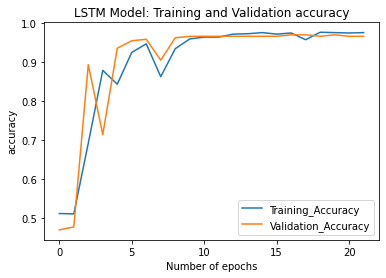

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

# Bidirectionnel LSTM

In [ ]:
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm,dropout=drop_lstm)))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = model2.fit(training_padded, train_labels, epochs=num_epochs,
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
33/33 - 4s - loss: 0.6855 - accuracy: 0.5479 - val_loss: 0.6655 - val_accuracy: 0.7443 - 4s/epoch - 112ms/step
Epoch 2/30
33/33 - 0s - loss: 0.5588 - accuracy: 0.8285 - val_loss: 0.4399 - val_accuracy: 0.8626 - 298ms/epoch - 9ms/step
Epoch 3/30
33/33 - 0s - loss: 0.3352 - accuracy: 0.8841 - val_loss: 0.2311 - val_accuracy: 0.9084 - 302ms/epoch - 9ms/step
Epoch 4/30
33/33 - 0s - loss: 0.1688 - accuracy: 0.9483 - val_loss: 0.1382 - val_accuracy: 0.9618 - 301ms/epoch - 9ms/step
Epoch 5/30
33/33 - 0s - loss: 0.1454 - accuracy: 0.9540 - val_loss: 0.1243 - val_accuracy: 0.9618 - 298ms/epoch - 9ms/step
Epoch 6/30
33/33 - 0s - loss: 0.1035 - accuracy: 0.9684 - val_loss: 0.0926 - val_accuracy: 0.9656 - 301ms/epoch - 9ms/step
Epoch 7/30
33/33 - 0s - loss: 0.0874 - accuracy: 0.9770 - val_loss: 0.1115 - val_accuracy: 0.9580 - 332ms/epoch - 10ms/step
Epoch 8/30
33/33 - 0s - loss: 0.0732 - accuracy: 0.9808 - val_loss: 0.1188 - val_accuracy: 0.9580 - 307ms/epoch - 9ms/step


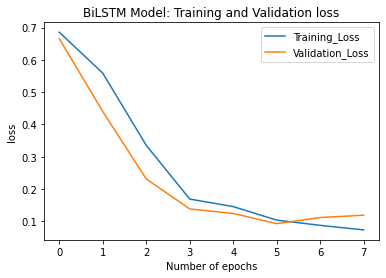

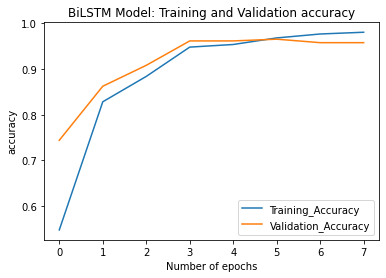

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [ ]:
print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, test_labels)} " )
print(f"LSTM architecture loss and accuracy: {model1.evaluate(testing_padded, test_labels)} " )
print(f"Bi-LSTM architecture loss and accuracy: {model2.evaluate(testing_padded, test_labels)} " )

9/9 [==============================] - 0s 2ms/step - loss: 0.0938 - accuracy: 0.9580
Dense architecture loss and accuracy: [0.0938425213098526, 0.9580152630805969] 
9/9 [==============================] - 0s 4ms/step - loss: 0.1532 - accuracy: 0.9656
LSTM architecture loss and accuracy: [0.15319888293743134, 0.9656488299369812] 
9/9 [==============================] - 0s 5ms/step - loss: 0.1188 - accuracy: 0.9580
Bi-LSTM architecture loss and accuracy: [0.11875876784324646, 0.9580152630805969] 


# CROSS VALIDATION LSTM

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.callbacks import EarlyStopping
def mmodel():
  vocab_size = 500
  embeding_dim = 16
  drop_value = 0.2
  n_dense = 24
  vocab_size = len(vocab)
  rnn_neurons = 1026

  model = Sequential()
  model.add(Embedding(vocab_size, embeding_dim, input_length=50))
  model.add(LSTM(20,dropout=0.2))
  #model.add(LSTM(20, dropout=drop_lstm, return_sequences=True))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model
model=KerasClassifier(build_fn=mmodel,epochs=150, batch_size=32)
precision=cross_val_score(estimator=model,X=training_padded,y=train_labels,cv=10)
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/150
30/30 [==============================] - 2s 7ms/step - loss: 0.6932 - accuracy: 0.5059
Epoch 2/150
30/30 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.4984
Epoch 3/150
30/30 [==============================] - 0s 6ms/step - loss: 0.6195 - accuracy: 0.7050
Epoch 4/150
30/30 [==============================] - 0s 6ms/step - loss: 0.4091 - accuracy: 0.8775
Epoch 5/150
30/30 [==============================] - 0s 6ms/step - loss: 0.2817 - accuracy: 0.9212
Epoch 6/150
30/30 [==============================] - 0s 7ms/step - loss: 0.2252 - accuracy: 0.9382
Epoch 7/150
30/30 [==============================] - 0s 7ms/step - loss: 0.2032 - accuracy: 0.9457
Epoch 8/150
30/30 [==============================] - 0s 6ms/step - loss: 0.2187 - accuracy: 0.9340
Epoch 9/150
30/30 [==============================] - 0s 6ms/step - loss: 0.1650 - accuracy: 0.9531
Epoch 10/150
30/30 [==============================] - 0s 6ms/step - loss: 0.1441 - accuracy: 0.9649
Epoch 11/

In [ ]:
precision
moyenne=precision.mean()
ecart_type=precision.std()
print("moyenne de precision",moyenne)
print("ecart_type de precision",ecart_type)

moyenne de precision 0.9368040263652802
ecart_type de precision 0.011392572325284508


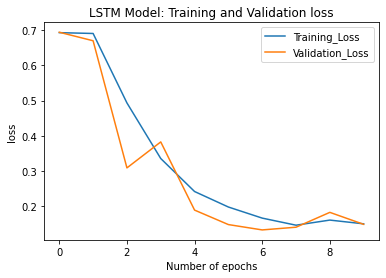

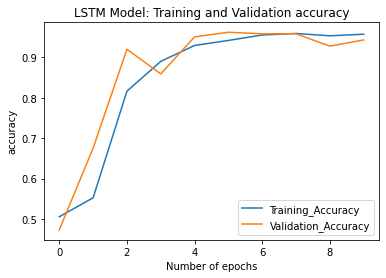

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

# GridSearchCV LSTM

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def mmodel(optimizer):
  vocab_size = 500
  embeding_dim = 16
  drop_value = 0.2
  n_dense = 24
  vocab_size = len(vocab)
  rnn_neurons = 1026

  model = Sequential()
  model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
  model.add(LSTM(20,dropout=0.2))
  #model.add(LSTM(20, dropout=drop_lstm, return_sequences=True))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return model
model=KerasClassifier(build_fn=mmodel)
param={"epochs":[16,100], "batch_size":[32,40,60],"optimizer":["adam","rmsprop"]}
grid_search=GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',cv=10)
grid_search=grid_search.fit(training_padded,train_labels)
"""num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)"""

best_param=grid_search.best_params_
best_precision=grid_search.best_score_
modelf= grid_search.best_estimator_
modelf.score(testing_padded,test_labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 38/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0818 - accuracy: 0.9798
Epoch 39/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0893 - accuracy: 0.9745
Epoch 40/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0755 - accuracy: 0.9787
Epoch 41/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0862 - accuracy: 0.9766
Epoch 42/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0859 - accuracy: 0.9766
Epoch 43/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0782 - accuracy: 0.9787
Epoch 44/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0885 - accuracy: 0.9766
Epoch 45/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0795 - accuracy: 0.9787
Epoch 46/100
24/24 [==============================] - 0s 10ms/step - loss: 0.0832 - accuracy: 0.9745
Epoch 47/100
24/24 [=

0.9580152630805969

In [ ]:
print("best_param",best_param)
print("best_precision",best_precision)
print("best estimatot :",modelf)
print("modelf.score(testing_padded,test_labels) :",modelf.score(testing_padded,test_labels))

best_param {'batch_size': 40, 'epochs': 16, 'optimizer': 'adam'}
best_precision 0.9473351648351647
best estimatot : <keras.wrappers.scikit_learn.KerasClassifier object at 0x7fc8bb2ceb50>
7/7 [==============================] - 0s 4ms/step - loss: 0.1482 - accuracy: 0.9580
modelf.score(testing_padded,test_labels) : 0.9580152630805969


# CROSS VALIDATION BILSTM

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.callbacks import EarlyStopping
def mmodel1():
  vocab_size = 500
  embeding_dim = 16
  drop_value = 0.2
  n_dense = 24
  vocab_size = len(vocab)
  rnn_neurons = 1026

  n_lstm = 20
  drop_lstm =0.2
  model2 = Sequential()
  model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
  model2.add(Bidirectional(LSTM(n_lstm,dropout=drop_lstm)))
  model2.add(Dense(1, activation='sigmoid'))
  model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model2
modelb=KerasClassifier(build_fn=mmodel1,epochs=150, batch_size=32)
precision=cross_val_score(estimator=modelb,X=training_padded,y=train_labels,cv=10)
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = modelb.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/150
30/30 [==============================] - 3s 9ms/step - loss: 0.6826 - accuracy: 0.5783
Epoch 2/150
30/30 [==============================] - 0s 9ms/step - loss: 0.5613 - accuracy: 0.7902
Epoch 3/150
30/30 [==============================] - 0s 9ms/step - loss: 0.3788 - accuracy: 0.8647
Epoch 4/150
30/30 [==============================] - 0s 10ms/step - loss: 0.2332 - accuracy: 0.9201
Epoch 5/150
30/30 [==============================] - 0s 9ms/step - loss: 0.2030 - accuracy: 0.9318
Epoch 6/150
30/30 [==============================] - 0s 9ms/step - loss: 0.1832 - accuracy: 0.9329
Epoch 7/150
30/30 [==============================] - 0s 10ms/step - loss: 0.1830 - accuracy: 0.9212
Epoch 8/150
30/30 [==============================] - 0s 10ms/step - loss: 0.1436 - accuracy: 0.9531
Epoch 9/150
30/30 [==============================] - 0s 9ms/step - loss: 0.1345 - accuracy: 0.9542
Epoch 10/150
30/30 [==============================] - 0s 10ms/step - loss: 0.1315 - accuracy: 0.9585
Epoch

In [ ]:
precision
moyenne=precision.mean()
ecart_type=precision.std()
print("moyenne de precision",moyenne)
print("ecart_type de precision",ecart_type)

moyenne de precision 0.9367948710918427
ecart_type de precision 0.0219120940956164


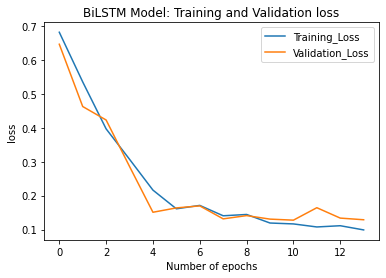

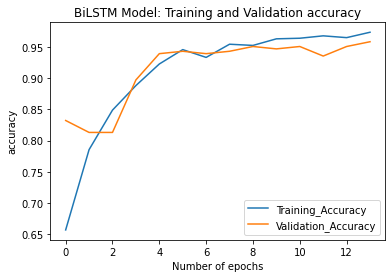

In [ ]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

# Matrice de confusion pour le model LSTM

In [ ]:
y_predict = [1 if o>0.5 else 0 for o in model1.predict(testing_padded)]

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix =confusion_matrix(test_labels, y_predict)
tn, fp, fn, tp = confusion_matrix(test_labels, y_predict).ravel()

print("Precision: {:.2f}%".format(100 * precision_score(test_labels, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(test_labels, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(test_labels, y_predict)))

Precision: 97.50%
Recall: 95.12%
F1 Score: 96.30%


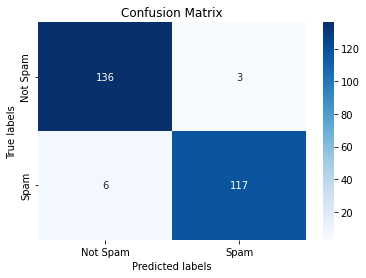

In [ ]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

# TESTER DES PREDICTIONS

In [ ]:
# display long string
pd.options.display.max_colwidth=100
messages[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...


In [ ]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [ ]:
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))
predict_spam(predict_msg)

array([[0.00697108],
       [0.006195  ],
       [0.99948287]], dtype=float32)

In [ ]:
predict_msg = ["You are awarded a Nikon Digital Camera. Call now",
               "Call me",
          "What's up?"]
predict_spam(predict_msg)

array([[0.91328067],
       [0.04847113],
       [0.01544909]], dtype=float32)